## Segmentação de imagens por Crescimento de Região (Level Set)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
import glob
import cv2
from skimage.exposure import equalize_hist
from skimage.segmentation import morphological_chan_vese
from skimage import io, color

In [7]:
def region_growth_level_set(image, num_iter, init_level):
    # Convertendo a imagem para escala de cinza se necessário
    if image.ndim == 3:
        image = color.rgb2gray(image)

    # Aplicando o método Chan-Vese para segmentação
    segmented = morphological_chan_vese(image, num_iter=num_iter, init_level_set=init_level, smoothing=1, lambda1=3, lambda2=3)

    return segmented


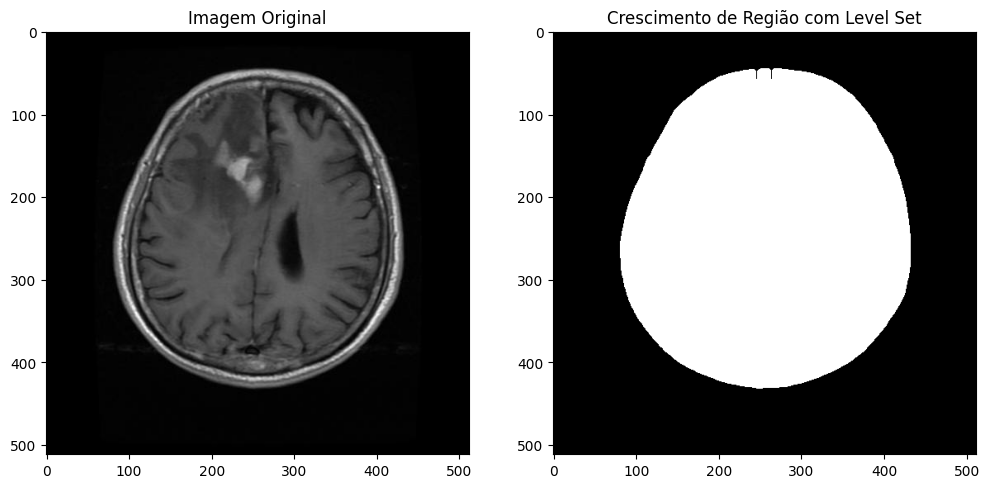

In [8]:

# Carregar a imagem
image_path = "glioma_tumor/gg (5).jpg"  # Substitua pelo caminho correto
image = io.imread(image_path)

# Aplicar o algoritmo de crescimento de região com Level Set
segmented_image = region_growth_level_set(image, num_iter = 200, init_level="disk")

# Visualização dos resultados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Crescimento de Região com Level Set')

plt.show()


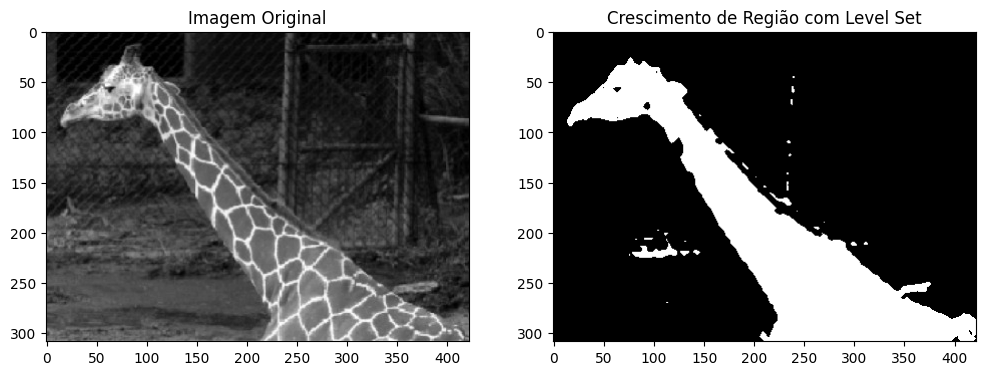

In [10]:
# Carregar a imagem
image_path = "imagens/giraffe.jpg"
image = io.imread(image_path)

# Aplicar o algoritmo de crescimento de região com Level Set
segmented_image = region_growth_level_set(image, num_iter = 300, init_level="disk")

# Visualização dos resultados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Crescimento de Região com Level Set')

plt.show()



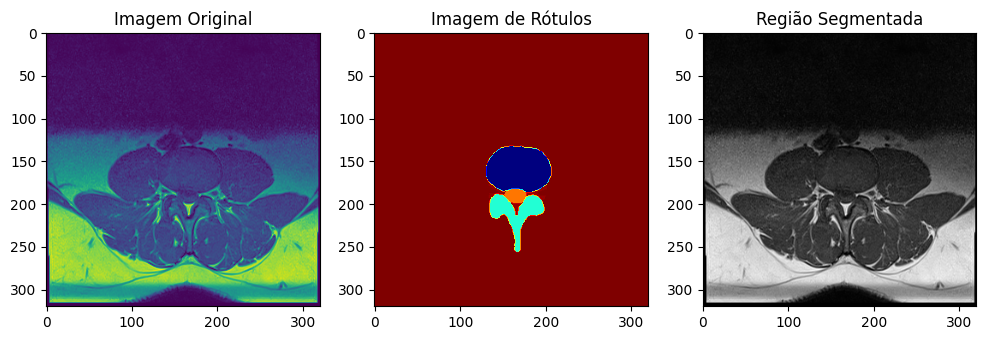

In [5]:


def segment_region_by_label(image, label_image, target_label, iterations=300, init_level_set="checkerboard"):
    # Criar uma máscara com base no rótulo desejado
    mask = (label_image == target_label)

    # Converter a imagem para escala de cinza se necessário
    if image.ndim == 3:
        gray_image = color.rgb2gray(image)
    else:
        gray_image = image

    # Aplicar a função morphological_chan_vese para segmentar a região da imagem de rótulos
    segmented_region = morphological_chan_vese(mask.astype(float), num_iter=iterations, init_level_set=init_level_set)

    # Aplicar a região segmentada à imagem original
    segmented_image = np.copy(gray_image)
    segmented_image[mask] = segmented_region[mask]

    return segmented_image

def main():
    # Carregar a imagem
    image_path = "imagens/T1_0001_D3.png"  # Substitua pelo caminho correto
    image = io.imread(image_path)

    # Carregar a imagem de rótulos (label_image)
    label_image_path = "imagens/L1_0001_D3.png"  # Substitua pelo caminho correto
    label_image = io.imread(label_image_path, as_gray=True)

    # Escolher um rótulo (target_label) específico para segmentação
    target_label = 1  # Substitua pelo rótulo desejado

    # Aplicar a função para segmentar a região com base no rótulo
    segmented_region = segment_region_by_label(image, label_image, target_label)

    # Visualização dos resultados
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title('Imagem Original')

    plt.subplot(1, 3, 2)
    plt.imshow(label_image, cmap='jet')
    plt.title('Imagem de Rótulos')

    plt.subplot(1, 3, 3)
    plt.imshow(segmented_region, cmap='gray')
    plt.title('Região Segmentada')

    plt.show()

if __name__ == "__main__":
    main()


O símbolo "∇" é chamado de nabla ou del, e "ϕ" é a letra phi. Quando combinados, "∇ϕ" pode ser lido como "nabla phi". Em termos de notação matemática, "∇" representa o operador nabla, que é comumente usado em cálculo vetorial para representar o gradiente de uma função escalar. "ϕ" geralmente representa uma função escalar.

Portanto, "∇ϕ" pode ser interpretado como o gradiente da função escalar "ϕ". O gradiente é um vetor que aponta na direção de maior crescimento da função e sua magnitude indica a taxa de variação máxima da função nessa direção. Essa expressão é frequentemente usada em contextos matemáticos e físicos para descrever propriedades de campos escalares.

A equação indica que a derivada temporal da função Level Set é proporcional à magnitude do gradiente e à função de velocidade F. A função de velocidade F pode ser definida de diferentes maneiras para controlar o movimento da curva com base em propriedades da imagem.

O método Level Set oferece vantagens, como a manipulação natural de topologia, a capacidade de tratar automaticamente a divisão e fusão de regiões, e a facilidade de incorporar informações de imagem. Por outro lado, a implementação pode ser computacionalmente intensiva e requer métodos numéricos eficientes para resolver a equação de evolução.

A aplicação prática do método Level Set abrange diversas áreas, como segmentação de imagem, rastreamento de objetos, reconhecimento de contornos, e análise de forma, entre outros. Implementações eficientes geralmente envolvem técnicas avançadas de discretização numérica, como esquemas de diferenças finitas ou métodos espectrais.

## Função morphological_chan_vese
skimage.segmentação. morphological_chan_vese ( imagem , num_iter , init_level_set='checkerboard' , smoothing=1 , lambda1=1 , lambda2=1 , iter_callback=<função <lambda>> )[fonte]
Contornos Morfológicos Ativos sem Bordas (MorphACWE)

Contornos ativos sem arestas implementados com operadores morfológicos. Pode ser utilizado para segmentar objetos em imagens e volumes sem bordas bem definidas. É necessário que o interior do objeto pareça, em média, diferente do exterior (ou seja, a área interna do objeto deve ser mais escura ou mais clara que a área externa, em média).

Parâmetros:
- imagem Matriz (M, N) ou (L, M, N)
Imagem ou volume em tons de cinza a ser segmentado.

num_path unint
- Número de num_iter a ser executado

- init_level_set
str, matriz (M, N) ou matriz (L, M, N)
Nível inicial definido. Se uma matriz for fornecida, ela será binarizada e usada como conjunto de nível inicial. Se uma string for fornecida, ela define o método para gerar um nível inicial razoável definido com o formato da imagem . Os valores aceitos são 'tabuleiro de xadrez' e 'disco'. 

- skimage.segmentação. checkerboard_level_set ( formato_da_imagem , tamanho_quadrado = 5 )[fonte]
Crie um nível de xadrez definido com valores binários.

Parâmetros :
forma_da_imagem
tupla de inteiros positivos
Forma da imagem.

tamanho_quadrado
interno, opcional
Tamanho dos quadrados do tabuleiro de xadrez. O padrão é 5.

Retorna :
matriz com forma image_shape
Conjunto de nível binário do tabuleiro de damas.

- skimage.segmentação. disk_level_set ( image_shape , * , centro = Nenhum , raio = Nenhum )[fonte]
Crie um conjunto de níveis de disco com valores binários.

Parâmetros :
forma_da_imagem
tupla de inteiros positivos
Forma da imagem

Centro
tupla de inteiros positivos, opcional
Coordenadas do centro do disco fornecidas em (linha, coluna). Se não for fornecido, o padrão será o centro da imagem.

raio
flutuante, opcional
Raio do disco. Se não for fornecido, será definido como 75% da menor dimensão da imagem.

Retorna :
matriz com forma image_shape
Conjunto de nível binário do disco com raio e centro determinados .


- suavização
unint, opcional
Número de vezes que o operador de suavização é aplicado por iteração. Valores razoáveis ​​estão em torno de 1-4. Valores maiores levam a segmentações mais suaves.

- lambda1
flutuante, opcional
Parâmetro de peso para a região externa. Se lambda1 for maior que lambda2 , a região externa conterá um intervalo de valores maior que a região interna.

- lambda2
flutuante, opcional
Parâmetro de peso para a região interna. Se lambda2 for maior que lambda1 , a região interna conterá um intervalo de valores maior que a região externa.

- iter_callback
função, opcional
Se fornecida, esta função é chamada uma vez por iteração com o nível atual definido como único argumento. Isto é útil para depuração ou para traçar resultados intermediários durante a evolução.

Devoluções:
fora
Matriz (M, N) ou (L, M, N)
Segmentação final (ou seja, o nível final definido)